# TI3130: Regression Lab &mdash; Exercises (variant B)
**Julián Urbano &mdash; December 2021**

In [1]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
import statsmodels.api as sm
import statsmodels.formula.api as smf

print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__,
      "\nstatsmodels", sm.__version__)

python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)] 
numpy 1.21.4 
pandas 1.3.5 
plotnine 0.8.0 
statsmodels 0.13.1


For these exercises we will use the _Amsterdam Lite_ dataset, the _Advertising_ dataset, and the _Wages_ dataset. Please refer to their HTML files for a description of the variables.

**Slide numbers refer to the page of the slides PDF, not the recordings.** Page _Lx_ refers to page _x_ of the _The Linear Model_ lecture. Page _Rx_ refers to page _x_ of the _Regression_ lecture.

In [2]:
ams = pd.read_csv('amsterdam_lite.csv')
adv = pd.read_csv('advertising.csv')
wage = pd.read_csv('wages.csv')

**a) Fit a model of `sales` by `newspaper`, and report the results as in slide L15 (the coefficients and the three plots). Based on these results, describe two differences with respect to the model in the slide.**

Coefficients: intercept = 12.3514, newspaper = 0.0547. One difference between the model in the slide and our model is that the residuals in our model don't follow a symmetric distribution. Another difference is that the residuals seem to be less heteroskedastic in our model. Finally, our model seems to explain the sales variable poorer than the model from the slides, i.e., our $R^2$ is very low. 

In [3]:
g = ggplot(adv, aes('newspaper', 'sales')) + \
    geom_point()
m = smf.ols('sales ~ newspaper', adv).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 17 Dec 2021   Prob (F-statistic):            0.00115
Time:                        12:43:17   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

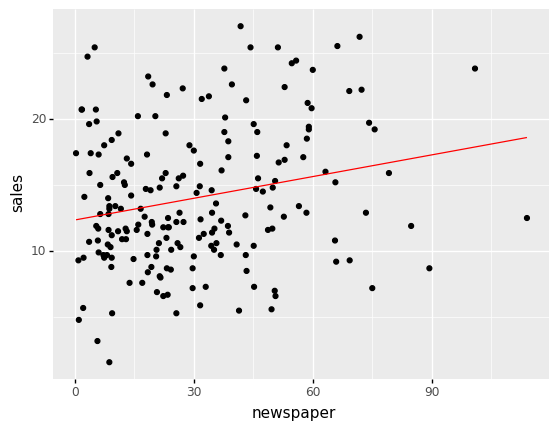

<ggplot: (113614837881)>

In [4]:
d = adv.assign(_resid = m.resid, _fitted = m.fittedvalues)
g + geom_line(aes(y = '_fitted'), data = d, color = 'red')

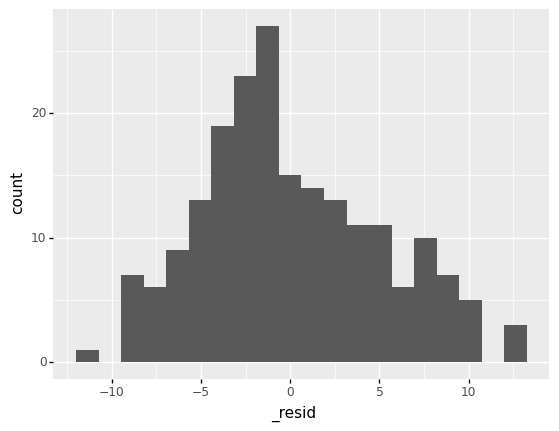

<ggplot: (113617146862)>

In [5]:
ggplot(d, aes('_resid')) +\
    geom_histogram(bins=20)

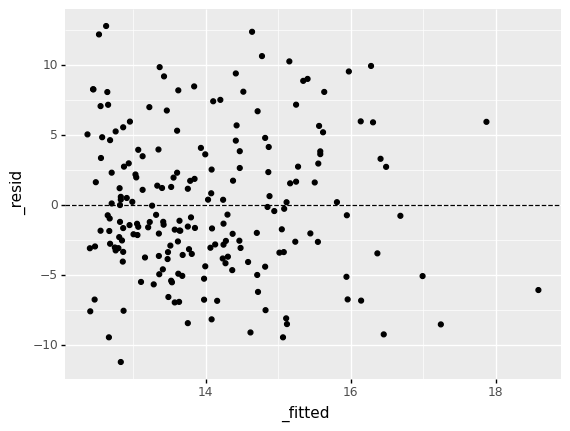

<ggplot: (113617073493)>

In [6]:
ggplot(d, aes('_fitted', '_resid')) +\
    geom_point() +\
    geom_hline(yintercept = 0, linetype = 'dashed')

**b) Make the two plots in slide L21 with the `sales` and `newspaper` variables. You only need to show the two blue lines and the two red lines, with no text annotations. Plotnine's [`geom_abline`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_abline.html) will be helpful.**

In [7]:
m_alt = smf.ols('newspaper ~ sales', adv).fit()
m_alt.summary()
a, b = m.params
a_alt, b_alt = m_alt.params

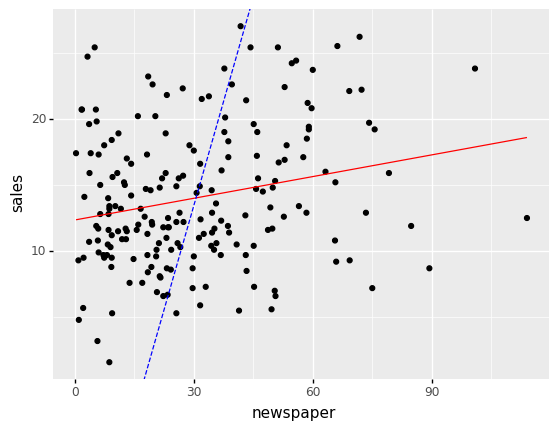

<ggplot: (113617119609)>

In [8]:
d = adv.assign(_resid = m.resid, _fitted = m.fittedvalues)
g + geom_line(aes(y = '_fitted'), data = d, color = 'red') +\
geom_abline(aes(intercept = -a_alt/b_alt, slope=1/b_alt), color='blue', linetype='dashed')

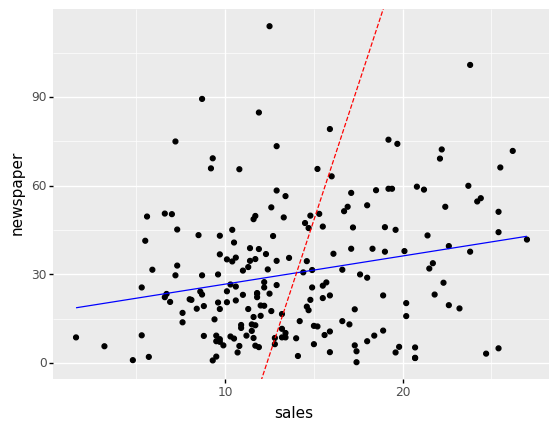

<ggplot: (113617189780)>

In [9]:
g_alt = ggplot(adv, aes('sales', 'newspaper')) + \
    geom_point()
d_alt = adv.assign(_resid = m_alt.resid, _fitted = m_alt.fittedvalues)
g_alt + geom_line(aes(y = '_fitted'), data = d_alt, color = 'blue') +\
geom_abline(aes(intercept = -a/b, slope=1/b), color='red', linetype='dashed')

**c) Reproduce the plot in slide L49, also including the simple linear model in black. Don't worry about the _x_-axis extending until 0.**

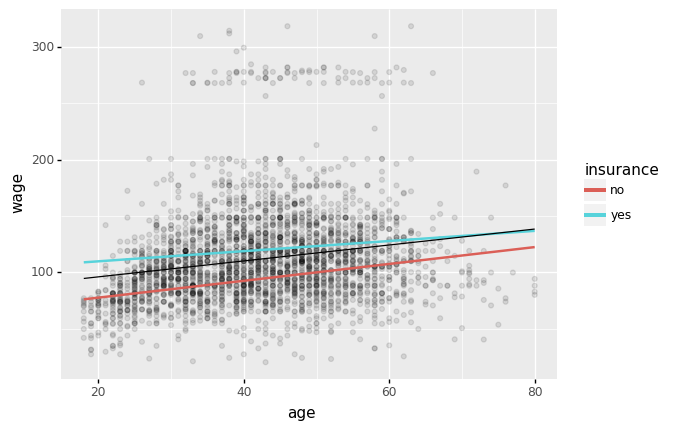

<ggplot: (113617235330)>

In [10]:
m = smf.ols('wage ~ age + insurance + age:insurance', wage).fit()
m.summary()
d = wage.assign(_resid = m.resid, _fitted = m.fittedvalues)

m_simple = smf.ols('wage ~ age', wage).fit()
m_simple.summary()
d_simple = wage.assign(_resid = m_simple.resid, _fitted = m_simple.fittedvalues)

g = ggplot(wage, aes('age', 'wage')) + \
    geom_point(alpha = 0.1)

g + geom_line(aes(y = '_fitted', colour = 'insurance'), data = d, size = 1) + \
    geom_line(aes(y = '_fitted'), data = d_simple, color = 'black')

**d) Which factor has the largest effect on the `wage`: `education` or `jobclass`? Use a linear model to answer the question.**

Answer: as we can see in the OLS Regression Results, the difference between each of the education levels is greater than the difference between jobclass in magnitude. Furthermore, the differences between the education levels are 'more' significant than the jobclass levels as the absulute values of the t-statistics larger than the jobclass t-statistic. Therefore, the education has a greater effect on wage.

In [11]:
m = smf.ols('wage ~ education + jobclass', wage).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     187.8
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          2.38e-174
Time:                        12:43:18   Log-Likelihood:                -15041.
No. Observations:                3000   AIC:                         3.009e+04
Df Residuals:                    2994   BIC:                         3.013e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    87.9790      2.437     36.105      0.000      83.201      92.757
education[T.2.highschool]    11.3840      2.515      4.526      0.000       6.452      16.316
education[T.3.bachelor]      22.6521      2.658      8.524      0.000      17.441      27.863
education[T.4.master]        38.6350      2.661     14.520      0.000      33.418      43.852
education[T.5.phd]           64.2474      2.916     22.033      0.000      58.530      69.965
jobclass[T.industrial]       -5.4651      1.399     -3.907      0.000      -8.208      -2.723
==============================================================================
Omnibus:                      965.473   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4563.278
Skew:                           1.475   Prob(JB):                         0.00
Kurtosis:                       8.273   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**e) Build a logistic model to predict `unemployment` with `inc_gini` and `district`. Show the regression lines in both the link space and the response space, as we did in slide R54, using different colors for `district`s.**

In [12]:
ams = ams.assign(unemployment = ams.pop_unemployed / ams.pop_total)
m1 = smf.glm('unemployment ~ inc_gini + district', ams, family = sm.families.Binomial()).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           unemployment   No. Observations:                  413
Model:                            GLM   Df Residuals:                      405
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -88.782
Date:                Fri, 17 Dec 2021   Deviance:                       4.4978
Time:                        12:43:18   Pearson chi2:                     4.65
No. Iterations:                     6   Pseudo R-squ. (CS):           0.007315
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.3491      1.882     -0.186      0.853      -4.037       3.339
district[T.E West]          -0.1188      0.802     -0.148      0.882      -1.691       1.453
district[T.F Nieuw-West]    -0.4644      0.914     -0.508      0.611      -2.256       1.327
district[T.K Zuid]          -0.2717      0.792     -0.343      0.731      -1.823       1.280
district[T.M Oost]          -0.3239      0.816     -0.397      0.691      -1.922       1.275
district[T.N Noord]         -0.3902      0.980     -0.398      0.691      -2.311       1.531
district[T.T Zuidoost]      -0.2539      1.002     -0.253      0.800      -2.218       1.710
inc_gini                    -6.0073      4.954     -1.213      0.225     -15.716       3.702
============================================================================================
"""

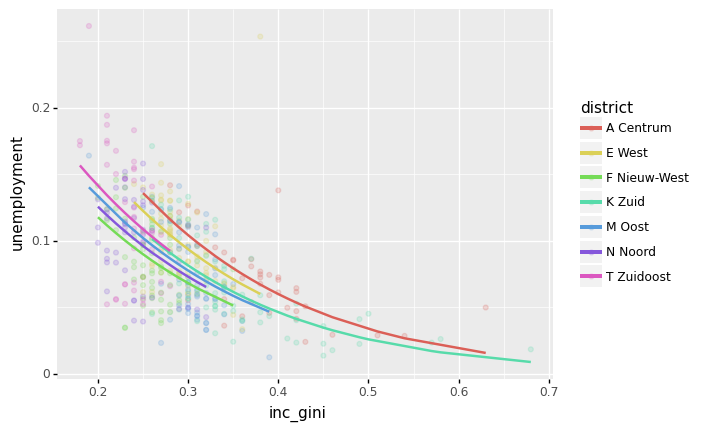

<ggplot: (113618306301)>

In [13]:
d = ams.assign(_resid = m1.resid_response, _fitted = m1.fittedvalues)

ggplot(d, aes('inc_gini', 'unemployment')) +\
  geom_point(aes(color='district'), data=d, alpha = 0.2) +\
  geom_line(aes(y = '_fitted', color = 'district'), data=d, size=1)

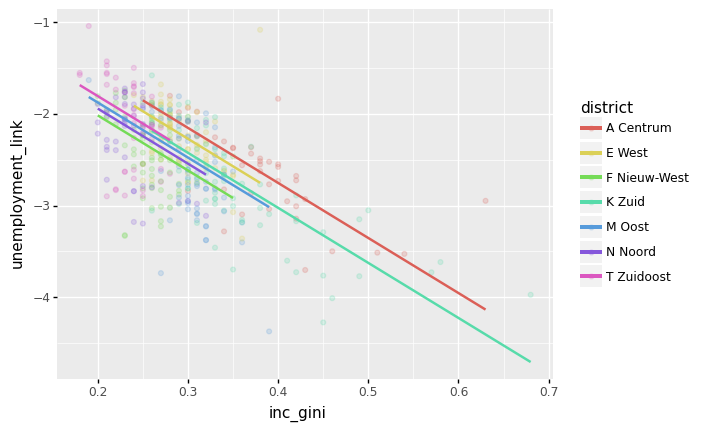

<ggplot: (113618396932)>

In [14]:
d = ams.assign(unemployment_link = m1.family.link(ams['unemployment']), _fitted_link = m1.family.link(m1.fittedvalues))

ggplot(d, aes('inc_gini', 'unemployment_link')) +\
  geom_point(aes(color='district'), data=d, alpha = 0.2) +\
  geom_line(aes(y = '_fitted_link', color = 'district'), data=d, size=1)

**f) In the tutorial we fitted a logistic model `unemployment ~ I(1/inc_income)*spa_playing`, and plotted it in the response space. However, the regression lines did not span the whole range of `inc_income` because we plotted them only at observed values of `inc_income`. Make a new plot making sure the lines _do_ span the whole range. Functions [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and [`pd.merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) (with a `cross` join) will be useful.**

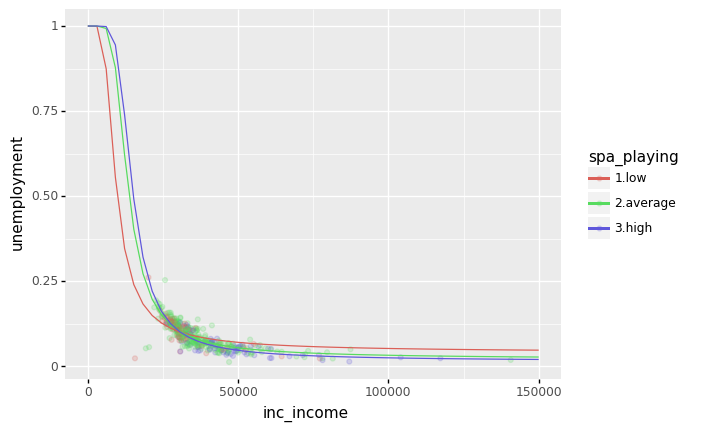

<ggplot: (113618544900)>

In [15]:
m = smf.glm('unemployment ~ I(1/inc_income)*spa_playing', ams, family = sm.families.Binomial()).fit()
m.summary()
d = ams.assign(_resid = m.resid_response, _fitted = m.fittedvalues, \
               _resid_link = m.resid_deviance, _fitted_link = m.family.link(m.fittedvalues))


incomes = pd.Series(np.linspace(1, 150_000), name='inc_income')
spas = pd.Series(['1.low', '2.average', '3.high'], name='spa_playing')
vals = pd.merge(incomes, spas, 'cross')
vals = vals.assign(predictions = m.predict(vals))


ggplot(d, aes('inc_income', 'unemployment', color = 'spa_playing')) +\
  geom_point(alpha = .2) +\
  geom_line(aes(x = 'inc_income', y = 'predictions'), data=vals)

**g) Fit a model to predict `wage` with `status` and `age`. Which group has a better salary according to the model, "married" or "separated"? Can we test whether this difference is statistically significant? If not, what do we need to change? See [here](https://www.statsmodels.org/stable/contrasts.html#treatment-dummy-coding) and [here](https://patsy.readthedocs.io/en/latest/API-reference.html#patsy.Treatment).**

The regression estimates of a married person is higher (99) than the estimate of a separated person (82). Therefore, the wage of a married person seems to be higher than a separated person, on average. Looking purely at the t-statistics, it seems that the diffence is large enough. 

However, this is not a formal statistical test. The model needs to be changed to include such test. One possibility is to manually add dummy variables for statuses, except for either married or separated. This way, one of those will be the base level and all different statuses including the other staus will be compared to either married or separated. And then, either the t-test or F-test can be performed to obtain the significance of difference between married and seperated people.

In [16]:
m = smf.ols('wage ~ status + age', wage).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.46e-52
Time:                        12:43:19   Log-Likelihood:                -15323.
No. Observations:                3000   AIC:                         3.066e+04
Df Residuals:                    2994   BIC:                         3.069e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  82.5868      4.393     18.799      0.000      73.973      91.201
status[T.married]          16.8877      2.944      5.736      0.000      11.115      22.661
status[T.never married]    -3.9322      3.387     -1.161      0.246     -10.573       2.709
status[T.separated]        -0.3059      6.089     -0.050      0.960     -12.245      11.633
status[T.widowed]          -4.9955      9.606     -0.520      0.603     -23.831      13.840
age                         0.4321      0.071      6.082      0.000       0.293       0.571
==============================================================================
Omnibus:                     1086.008   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4880.924
Skew:                           1.704   Prob(JB):                         0.00
Kurtosis:                       8.238   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**h) Fit a model of `wage` by `insurance` and `jobclass`, including their interaction. According to the model, what are the mean salaries in each of the four combinations? Confirm this by comparing to the sample means.**

Using the regression estimates and calculating them by hand
| Mean Salary | Insurance                         | No Insurance      |
|-------------|-----------------------------------|-------------------|
| IT          | $\beta_0+\beta_1$                 | $\beta_0$         |
| Industrial  | $\beta_0+\beta_1+\beta_2+\beta_3$ | $\beta_0+\beta_2$ |

$\beta_0 = 99.1285$,
$\beta_1 = 28.0538$,
$\beta_2 = -10.8634$,
$\beta_3 = -4.0636$

| Mean Salary | Insurance | No Insurance |
|-------------|-----------|--------------|
| IT          | 127.1823  | 99.1285      |
| Industrial  | 112.2553  | 88.2651      |



In [17]:
m = smf.ols('wage ~ insurance*jobclass', wage).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     138.8
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           3.39e-84
Time:                        12:43:19   Log-Likelihood:                -15255.
No. Observations:                3000   AIC:                         3.052e+04
Df Residuals:                    2996   BIC:                         3.054e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  99.1285      2.115     46.862      0.000      94.981     103.276
insurance[T.yes]                           28.0538      2.418     11.600      0.000      23.312      32.796
jobclass[T.industrial]                    -10.8634      2.671     -4.067      0.000     -16.101      -5.625
insurance[T.yes]:jobclass[T.industrial]    -4.0636      3.176     -1.279      0.201     -10.292       2.164
==============================================================================
Omnibus:                     1148.200   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5258.621
Skew:                           1.808   Prob(JB):                         0.00
Kurtosis:                       8.384   Cond. No.                         9.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**i) Create an _unambiguous_ and _nontrivial_ question, and its corresponding solution, as if you were writing the set of exercises for the lab. The question must cover _at least 3_ of the following aspects:**

- **Diagnosing the model**
- **Interpreting coefficients or their precision**
- **Categorical predictors, interactions or transformations**
- **Analysis of Variance**
- **Logistic regression**
- **An open-ended question to explain some behavior**

**Please make it explicit which 3 of these aspects your question covers. You can use any of the datasets available on Brightspace.**

**Perform backward selection (with an alpha of 15%) to explain sales numbers with a linear model using main effects and their interactions _(diagnosing model & interactions & implicit analysis of coefficient precision)_.  
How would you recommend a company to do its marketing _(open-ended behavior question & interpreting coefficients & interpreting precision)_?  
Does the model seem right _(general understanding of the material)_?**

With the output of the code below, the backward selection of features are shown. Every variable has a P-value lower than 15% (also even lower than 5%). 

Without checking the models validity, it would be recommended to spend its marketing budget in tv and radio, because these main effects increase sales about equally and both quite more than newspaper marketing. Furthermore, the ideal proportions would be around the same due to the positive interaction effect between them. Finally, the newspaper is really not recommended due to its lower main effect and the small but negative effect between tv and newspaper.

Although the $R^2$ seems quite high, the model needs some modification. First off, the residuals do not seem to follow a normal distribution as there seems to be a dip around 0 (& JB). Furthermore, the distribution is not symmetric but more skewed to the right. Lastly, the residuals display some relationship with the fitted values. Therefore, the models seems off and not quite right.

In [18]:
specification = 'sales ~ newspaper*tv*radio'

m = smf.ols(specification, adv).fit()

while np.max(m.pvalues) > 0.15:
    worst_variable = m.pvalues.index[np.argmax(m.pvalues)]
    specification += f' -{worst_variable}'
    m = smf.ols(specification, adv).fit()

m.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1197.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          1.13e-143
Time:                        12:43:19   Log-Likelihood:                -267.61
No. Observations:                 200   AIC:                             547.2
Df Residuals:                     194   BIC:                             567.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5408      0.265     24.668      0.000       6.018       7.064
newspaper        0.0134      0.006      2.105      0.037       0.001       0.026
tv               0.0203      0.002     12.675      0.000       0.017       0.024
newspaper:tv -7.719e-05   3.53e-05     -2.187      0.030      -0.000   -7.56e-06
radio            0.0202      0.010      2.073      0.039       0.001       0.039
tv:radio         0.0011   5.66e-05     20.059      0.000       0.001       0.001
==============================================================================
Omnibus:                      110.978   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              751.793
Skew:                          -2.044   Prob(JB):                    5.63e-164
Kurtosis:                      11.574   Cond. No.                     3.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

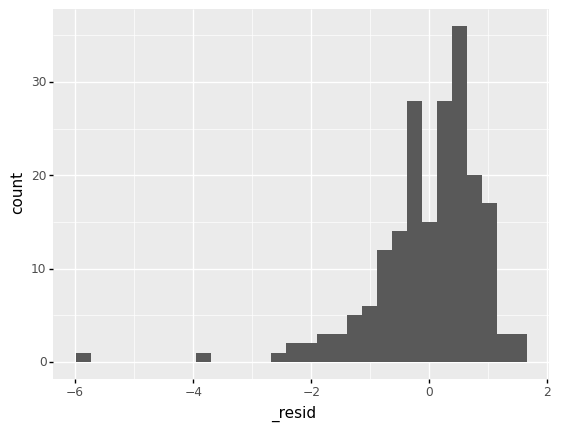

<ggplot: (113618667623)>

In [19]:
d = adv.assign(_resid = m.resid, _fitted = m.fittedvalues)
ggplot(d, aes('_resid')) +\
    geom_histogram(bins=30)

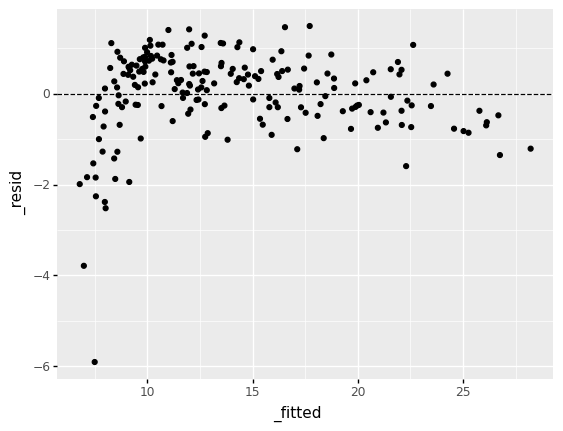

<ggplot: (113618667280)>

In [20]:
ggplot(d, aes('_fitted', '_resid')) +\
    geom_point() +\
    geom_hline(yintercept = 0, linetype = 'dashed')